<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/05_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5.7 Linear regression
Linear regression is an approach to model the relationship between two variables using linear function. We will use st.linregress function to perform linear regression. We will first generate some synthetic data using a known linear model, and will also add some noise using normally distributed
random variable. linregress provides correlation, p-value, and standard error of estimate apart
from model coefficients.

In [ ]:
import numpy as np
import scipy.stats as st

# generate the data
n = 100 # length of the data
x = np.random.rand(n)
y = 3 + 7*x + np.random.randn(n)

# perform linear regression
b, a, r, p, e = st.linregress(x, y)
print(a,b)

3.009522595161564 6.904971495788413


We generated data using linear model ($y = 3 + 7x + \epsilon$), while fitted linear regression model provides approximate estimate of $a$ and $b$, but not exactly the same. 
The difference in the fitted model and true model, is because of the noise. As you add more noise, you will see that the fitted model departs more from the reality. 

Below figure shows the true line ($y = 3 + 7x$), corrupted measurement ($y = 3 + 7x + \epsilon$), fitted line, and prediction interval for the fitted line. The fitted line and true line are matching reasonably. The prediction
interval are also quiet reasonable.

The variance of a predicted $Y_{pred}$ is given by,
$\sigma^2_{pred} = E\left[(Y_{pred} − \hat{Y})^2 \right] = \sigma^2_{\epsilon} \left( 1 + \frac{1}{n} + \frac{ (X_0 − \bar{X})^2} {\Sigma_{i=1}^{n} (X − \bar{X})^2}\right) $

Where, the $\sigma^2_{\epsilon}$  is estimated by $s^2$ (
the classic unbiased estimator of the residual variance). The $\sigma^2_{pred}$ is used to generate prediction interval using a Students t distribution with n−2 degrees of freedom
(because $s^2$ is an estimator). The confidence interval around $Y_{pred}$ is given by,
$PI = \sigma_{pred} ∗ z $ 
where, $PI$ is the prediction interval, $z$ is the value of Students t distribution at $\alpha$ significance level.

In [ ]:
eps = y - a - b*x # error of fitting and measured data
x1 = np.linspace(0, 1) # x axis to plot the PI

# variace of fitting error
e_pi = np.var(eps)*(1+1.0/n + (x1-x.mean())**2/np.sum((x-x.mean())**2))
# z value using the t distribution and with dof = n-2
z = st.t.ppf(0.95, n-2)
# prediction interval
pi = np.sqrt(e_pi)*z
zl = st.t.ppf(0.10, n-2) # z at 0.1
zu = st.t.ppf(0.90, n-2) # z at 0.9
ll = a + b*x1 + np.sqrt(e_pi)*zl # 10 %
ul = a + b*x1 + np.sqrt(e_pi)*zu # 90 %

Finally, we can plot the true line, fitted line, measurement corrupted with noise and prediction intervals.

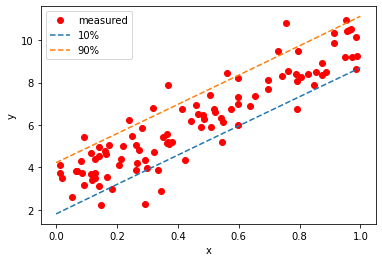

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,y,'ro', label='measured')
plt.plot(x1,ll,'--', label='10%')
plt.plot(x1,ul,'--', label='90%')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()